# **DEEP LEARNING COURSE PROJECT (IMAGE CLASSIFICATION)**

### **NAME:** ANISH SRIRAM B S
### **SCHOOL:** SCDS
### **EMAIL:** anishsriram.b-26@scds.saiuniversity.edu.in

## FINE TUNING - INCEPTION RESNETV2 MODEL

### LOADING THE DATASET

### Details:

*   Total Number of Images in the Dataset: 1661
*   Number of Images present per class:
    *   Number of Images in Motorbikes: 500
    *   Number of Images in Airplanes: 500
    *   Number of Images in Schooner: 63
*   Total Number of Images used for Training and Testing: 1063
    *   Number of Images used for Training: 797
    *   Number of Images used for Testing: 266

In [1]:
# Importing necessary modules
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from numpy import load
from sklearn.metrics import confusion_matrix, classification_report,precision_score,recall_score,f1_score
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [3]:
# Loading the dataset which is already processed
X_train_std = load('/content/drive/MyDrive/Deep Learning Project/Dataset/X_train_std.npy')
X_test_std = load('/content/drive/MyDrive/Deep Learning Project/Dataset/X_test_std.npy')
y_train = load('/content/drive/MyDrive/Deep Learning Project/Dataset/y_train.npy')
y_test = load('/content/drive/MyDrive/Deep Learning Project/Dataset/y_test.npy')

print("X_train_std_shape:",X_train_std.shape)
print("X_test_std_shape:",X_test_std.shape)
print("y_train_shape:",y_train.shape)
print("y_test_shape:",y_test.shape)

X_train_std_shape: (797, 299, 299, 3)
X_test_std_shape: (266, 299, 299, 3)
y_train_shape: (797,)
y_test_shape: (266,)


### LOADING THE TRANSFER LEARNING MODEL

In [4]:
# Loading the saved best TL model
model_3_FT = keras.models.load_model('/content/drive/MyDrive/Deep Learning Project/Model3/Best_model_3_TL.keras')
model_3_FT.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, None, None, 3)  │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, None, None, 32) │            864 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, None, None, 32) │             96 │ conv2d[0][0]           │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation (Activation)   │ (None, None, None, 32) │              0 │ batch_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, None, None, 32) │          9,216 │ activation[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, None, None, 32) │             96 │ conv2d_1[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_1 (Activation) │ (None, None, None, 32) │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, None, None, 64) │         18,432 │ activation_1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_2     │ (None, None, None, 64) │            192 │ conv2d_2[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_2 (Activation) │ (None, None, None, 64) │              0 │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, None, None, 64) │              0 │ activation_2[0][0]     │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, None, None, 80) │          5,120 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_3     │ (None, None, None, 80) │            240 │ conv2d_3[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_3 (Activation) │ (None, None, None, 80) │              0 │ batch_normalization_3… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, None, None,     │        138,240 │ activation_3[0][0]     │
│                           │ 192)                   │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_4     │ (None, None, None,     │            576 │ conv2d_4[0][0]         │
│ (BatchNormalization)      │ 192)                   │                │                        │
├──────────────────────

 Total params: 54,350,571 (207.33 MB)

 Trainable params: 4,611 (18.01 KB)

 Non-trainable params: 54,336,736 (207.28 MB)

 Optimizer params: 9,224 (36.04 KB)

### FINE TUNING

In [5]:
# Setting all the layers of the model as trainable
for layer in model_3_FT.layers:
  layer.trainable=True

# Compiling the model
model_3_FT.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

# Saving the best model using Callbacks
callbacks_3_FT = [keras.callbacks.ModelCheckpoint("Best_Model_3_FT.weights.h5",monitor="val_accuracy",save_weights_only=True,save_best_only=True)]

# Training the model
train_model_3_FT = model_3_FT.fit(x=X_train_std,y=y_train,epochs=10,validation_split=0.1,batch_size=16,callbacks=callbacks_3_FT)


Epoch 1/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 333s 3s/step - accuracy: 0.9687 - loss: 0.2039 - val_accuracy: 0.4750 - val_loss: 281.9308
Epoch 2/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 53s 910ms/step - accuracy: 0.9939 - loss: 0.0245 - val_accuracy: 0.5125 - val_loss: 5.3136
Epoch 3/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 42s 938ms/step - accuracy: 0.9945 - loss: 0.0158 - val_accuracy: 0.9875 - val_loss: 0.1445
Epoch 4/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 25s 546ms/step - accuracy: 0.9943 - loss: 0.0153 - val_accuracy: 0.9750 - val_loss: 0.8197
Epoch 5/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 60s 986ms/step - accuracy: 0.9943 - loss: 0.0260 - val_accuracy: 1.0000 - val_loss: 0.0020
Epoch 6/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 62s 533ms/step - accuracy: 0.9988 - loss: 0.0049 - val_accuracy: 1.0000 - val_loss: 0.0114
Epoch 7/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 42s 547ms/step - accuracy: 0.9936 - loss: 0.0132 - val_accuracy: 1.0000 - val_loss: 0.0059
Epoch 8/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 41s 550ms/step - accuracy: 0.9975 - loss: 0.0044 - val_accu

### GENERATING CONFUSION MATRIX

9/9 ━━━━━━━━━━━━━━━━━━━━ 38s 2s/step


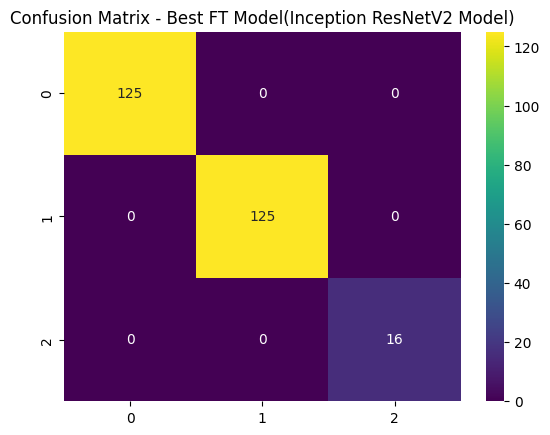

In [6]:
# Updating the model with best weights
model_3_FT.load_weights("Best_Model_3_FT.weights.h5")

# Getting the Prediction of the testing data
prob = model_3_FT.predict(X_test_std)
y_pred = np.argmax(prob,axis=1)

confmat_model3 = confusion_matrix(y_test, y_pred) # Generating the confusion matrix

sns.heatmap(confmat_model3, annot=True, fmt='d', cmap='viridis') # Plotting the confusion matrix
plt.title('Confusion Matrix - Best FT Model(Inception ResNetV2 Model)')
plt.show()



### GENERATING THE PRECISION, RECALL, F1 SCORE

In [7]:
precision_model3 = precision_score(y_test, y_pred,average='weighted') # Computing the precision score
recall_model3 = recall_score(y_test, y_pred,average='weighted') # Computing the recall score
f1_model3 = f1_score(y_test, y_pred,average='weighted') # Computing the F1 score

# Displaying the Classification Report
print("\nClassification Report - Best FT Model(Inception ResNetV2 Model)")
print(classification_report(y_test, y_pred,target_names=["Motorbikes","Airplanes","Schooners"]))
print("Precison Score:",precision_model3)
print("Recall Score:",recall_model3)
print("F1 Score:",f1_model3)



Classification Report - Best FT Model(Inception ResNetV2 Model)
              precision    recall  f1-score   support

  Motorbikes       1.00      1.00      1.00       125
   Airplanes       1.00      1.00      1.00       125
   Schooners       1.00      1.00      1.00        16

    accuracy                           1.00       266
   macro avg       1.00      1.00      1.00       266
weighted avg       1.00      1.00      1.00       266

Precison Score: 1.0
Recall Score: 1.0
F1 Score: 1.0
